## Simple_Linear_ALgorithm

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('height-weight.csv')

In [3]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


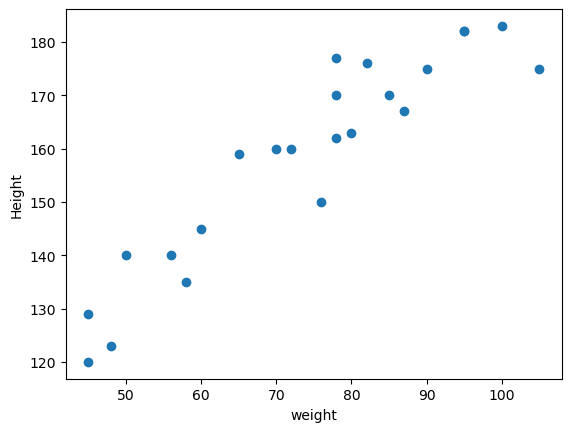

In [4]:
plt.scatter(x=df['Weight'], y=df['Height'])
plt.xlabel('weight')
plt.ylabel('Height')
plt.show()

## EDA

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Weight  23 non-null     int64
 1   Height  23 non-null     int64
dtypes: int64(2)
memory usage: 496.0 bytes


In [6]:
df.isnull().sum()

Weight    0
Height    0
dtype: int64

## Divide out dataset into independent and dependent features

In [7]:
x=df[['Weight']] # is should  be in row and columns.
y=df['Height']


In [8]:
x.shape, y.shape

((23, 1), (23,))

In [9]:
x.head()

,Weight
0,45
1,58
2,48
3,60
4,70


In [10]:
y.head()

0    120
1    135
2    123
3    145
4    160
Name: Height, dtype: int64

In [11]:
# Further decided the dataset into train and test.

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x_train, x_test, y_train, y_test =train_test_split(x,y, test_size=0.20, random_state=42)

In [14]:
x_train.shape, x_test.shape

((18, 1), (5, 1))

In [15]:
y_test.shape, y_train.shape

((5,), (18,))

In [16]:
x_train.head()

,Weight
12,105
1,58
13,100
5,78
2,48


In [17]:
x_test.head()

,Weight
15,78
9,78
0,45
8,95
17,65


In [18]:
y_train.head()

12    175
1     135
13    183
5     162
2     123
Name: Height, dtype: int64

In [19]:
y_test.head()

15    177
9     170
0     120
8     182
17    159
Name: Height, dtype: int64

## Standard scaling on the train and test dataset

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
obj=StandardScaler()

In [22]:
x_train=obj.fit_transform(x_train)

In [23]:
x_train

array([[ 1.73689094],
       [-0.92026952],
       [ 1.4542143 ],
       [ 0.21043706],
       [-1.48562281],
       [ 1.17153765],
       [-1.6552288 ],
       [-0.80719886],
       [-0.24184557],
       [ 0.0973664 ],
       [-1.37255215],
       [-1.03334018],
       [-0.12877492],
       [ 0.88886101],
       [ 0.43657837],
       [ 0.60618436],
       [ 0.71925502],
       [ 0.32350772]])

In [24]:
x_test=obj.transform(x_test)

In [25]:
x_test

array([[ 0.21043706],
       [ 0.21043706],
       [-1.6552288 ],
       [ 1.17153765],
       [-0.52452222]])

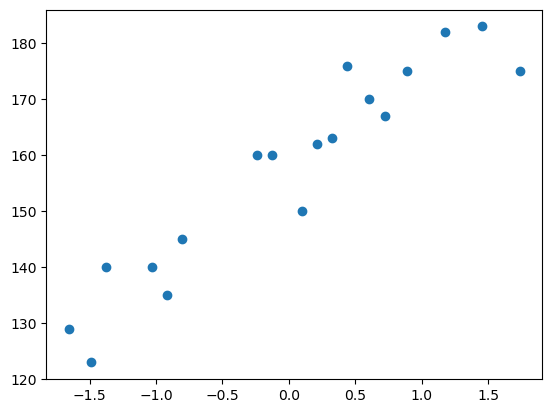

In [26]:
plt.scatter(x_train, y_train)

## Model training 

In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
obj_regressor=LinearRegression()

In [29]:
obj_regressor.fit(x_train, y_train)

LinearRegression()

In [30]:
obj_regressor.intercept_

157.5

In [31]:
obj_regressor.coef_

array([17.03440872])

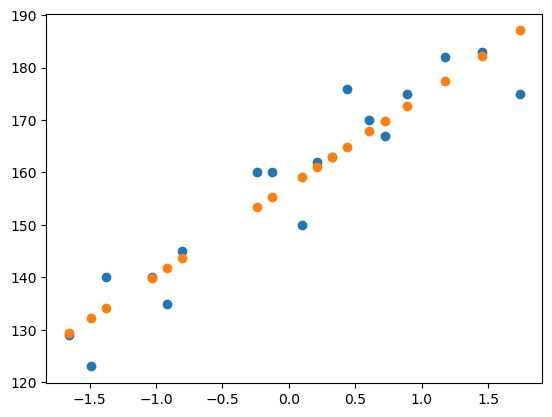

In [33]:
plt.scatter(x_train,y_train)
plt.scatter(x_train,obj_regressor.predict(x_train))

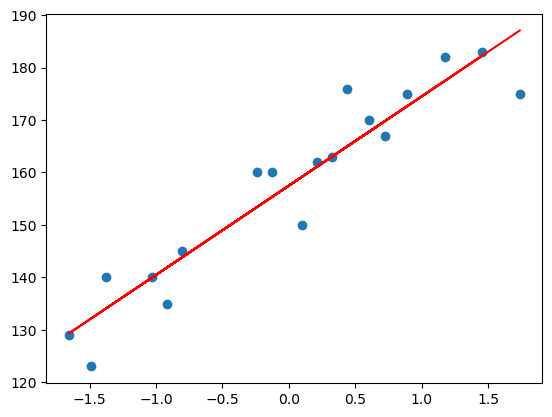

In [35]:
plt.scatter(x_train,y_train)
plt.plot(x_train,obj_regressor.predict(x_train),'r')

## Predication of train data
- Predicated height output = intercept + coef_(Weight)
- y_pred_train = 157.5 + 17.03(x_train)

## PRedication of test data.
- Predicated height output = intercept + coef_(weights)
- y_pred_test = 157.5 + 17.03(x_test)

## Predication for test data

In [36]:
y_pred_test= obj_regressor.predict(x_test)

In [37]:
y_pred_test

array([161.08467086, 161.08467086, 129.3041561 , 177.45645118,
       148.56507414])

In [38]:
y_test

15    177
9     170
0     120
8     182
17    159
Name: Height, dtype: int64

## Performance Matrics MAE, MSE, RMSE, 

In [40]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [41]:
mse= mean_squared_error(y_test, y_pred_test)
mae=mean_absolute_error(y_test, y_pred_test)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

109.77592599051664
9.822657814519232
10.477400726827081


## Accuracy of the model R squared and adjusted R-squared
## R squared 
Formula
**R^2 = 1- SSR/SST**

- R^2 = coefficient of determination
-- SSR = sum of squres of residuals
--SSt = total sum of squares

In [43]:
from sklearn.metrics import r2_score

In [44]:
score=r2_score(y_test, y_pred_test)
score

0.776986986042344

## adjusted R squared.

**Adjusted R2 =1- [(1-R2)*(n-1)/(n-k-1)]**

where: 
    
- R2 : The R2 of the model.
- n : The number of observations.
- k : The number of predicator variables

In [46]:
1-(1-score)* (len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

0.7026493147231252